In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

%matplotlib inline 

In [2]:
dataset = pd.read_parquet("data_output_operaciones_hyundai_grand_i10.parquet")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56182 entries, 0 to 56181
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   vin                     56182 non-null  object
 1   visitas                 56182 non-null  int64 
 2   year_modelo             56182 non-null  int64 
 3   ultimo_kilometraje      56182 non-null  int64 
 4   num_servicios           56182 non-null  int64 
 5   num_rep_llantas         56182 non-null  int64 
 6   num_rep_frenos          56182 non-null  int64 
 7   num_rep_amortiguadores  56182 non-null  int64 
 8   num_rep_transmision     56182 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 4.3+ MB


In [4]:
dataset.head()

,vin,visitas,year_modelo,ultimo_kilometraje,num_servicios,num_rep_llantas,num_rep_frenos,num_rep_amortiguadores,num_rep_transmision
0,MALA74BC0FM057165,1,2015,94550,0,0,0,0,0
1,MALA74BC0FM057313,2,2015,130233,0,0,0,0,0
2,MALA74BC0FM057490,1,2015,51921,1,0,2,0,0
3,MALA74BC0FM057506,1,2015,131489,1,0,0,0,0
4,MALA74BC0FM063547,6,2015,66309,25,8,0,0,1


In [5]:
grand_i10_variables = dataset.drop(['vin'], axis=1)
grand_i10_variables.head()

,visitas,year_modelo,ultimo_kilometraje,num_servicios,num_rep_llantas,num_rep_frenos,num_rep_amortiguadores,num_rep_transmision
0,1,2015,94550,0,0,0,0,0
1,2,2015,130233,0,0,0,0,0
2,1,2015,51921,1,0,2,0,0
3,1,2015,131489,1,0,0,0,0
4,6,2015,66309,25,8,0,0,1


In [6]:
grand_i10_variables.describe()

,visitas,year_modelo,ultimo_kilometraje,num_servicios,num_rep_llantas,num_rep_frenos,num_rep_amortiguadores,num_rep_transmision
count,56182.000000,56182.000000,5.618200e+04,56182.000000,56182.000000,56182.000000,56182.000000,56182.000000
mean,3.412855,2019.931295,6.882924e+04,4.577249,0.601474,0.126055,0.002474,0.035919
std,2.416645,2.365639,4.238509e+06,5.371330,2.257758,0.599260,0.060650,0.256404
min,1.000000,2015.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2018.000000,8.492250e+03,2.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2021.000000,2.784450e+04,3.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,2022.000000,6.048200e+04,6.000000,0.000000,0.000000,0.000000,0.000000
max,32.000000,2023.000000,1.000000e+09,101.000000,37.000000,15.000000,3.000000,8.000000


### Normalizando los datos

In [7]:
data_normalizada = (grand_i10_variables-grand_i10_variables.min()) / (grand_i10_variables.max()-grand_i10_variables.min())
data_normalizada.describe()


,visitas,year_modelo,ultimo_kilometraje,num_servicios,num_rep_llantas,num_rep_frenos,num_rep_amortiguadores,num_rep_transmision
count,56182.000000,56182.000000,56182.000000,56182.000000,56182.000000,56182.000000,56182.000000,56182.000000
mean,0.077834,0.616412,0.000069,0.045319,0.016256,0.008404,0.000825,0.004490
std,0.077956,0.295705,0.004239,0.053181,0.061020,0.039951,0.020217,0.032051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.032258,0.375000,0.000008,0.019802,0.000000,0.000000,0.000000,0.000000
50%,0.064516,0.750000,0.000028,0.029703,0.000000,0.000000,0.000000,0.000000
75%,0.129032,0.875000,0.000060,0.059406,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Búsqueda de la cantidad optima de clusters
- calculo de la similitud de los individuos dentro de los clusters

In [10]:
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(data_normalizada)
    wcss.append(kmeans.inertia_)

### Gráfica del codo de Jambú

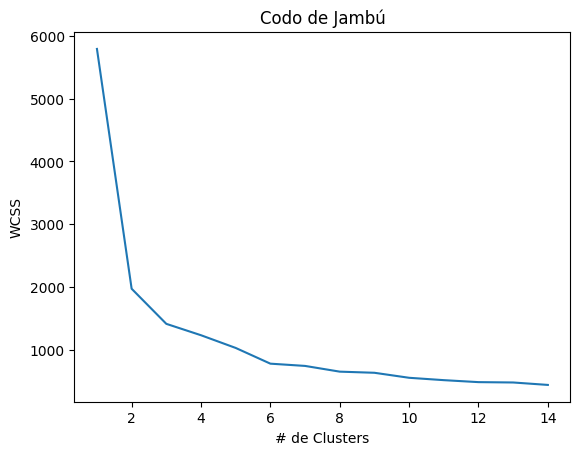

In [11]:
plt.plot(range(1,15), wcss)
plt.title("Codo de Jambú")
plt.xlabel("# de Clusters")
plt.ylabel("WCSS")
plt.show()

In [12]:
clustering = KMeans(n_clusters=5, max_iter=300)
clustering.fit(data_normalizada) ## Aplica el modelo a la base

KMeans(n_clusters=5)

In [13]:
print(clustering.inertia_)

901.9698362471481


### Aquí se agrega la clasificación al archivo original

In [14]:
dataset["KMeans_Clustering"] = clustering.labels_
dataset.head()

,vin,visitas,year_modelo,ultimo_kilometraje,num_servicios,num_rep_llantas,num_rep_frenos,num_rep_amortiguadores,num_rep_transmision,KMeans_Clustering
0,MALA74BC0FM057165,1,2015,94550,0,0,0,0,0,3
1,MALA74BC0FM057313,2,2015,130233,0,0,0,0,0,3
2,MALA74BC0FM057490,1,2015,51921,1,0,2,0,0,3
3,MALA74BC0FM057506,1,2015,131489,1,0,0,0,0,3
4,MALA74BC0FM063547,6,2015,66309,25,8,0,0,1,3


### Visualizando los clusters
- Utilizando PCA

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(data_normalizada)
pca_df = pd.DataFrame(data=pca_results, columns=["Componente_1", "Componente_2"])
pca_df_clusters = pd.concat([pca_df, dataset[["KMeans_Clustering"]]], axis=1)
#pca_df_clusters


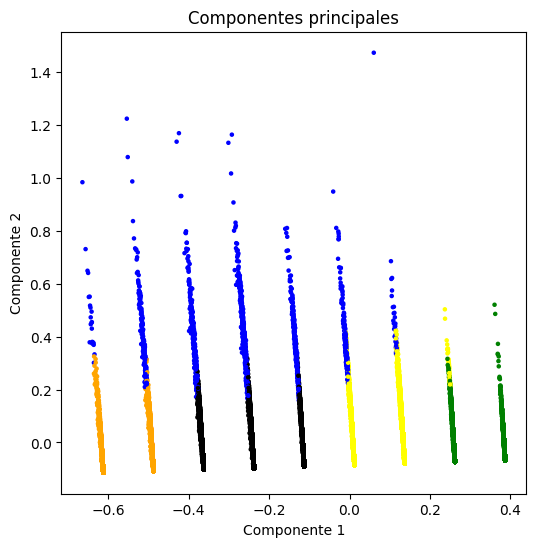

In [16]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")
ax.set_title("Componentes principales")

color_theme = np.array(["blue","green", "yellow","orange", "black"])
ax.scatter(x=pca_df_clusters.Componente_1, y=pca_df_clusters.Componente_2,
          c=color_theme[pca_df_clusters.KMeans_Clustering], s=5)

plt.show()


In [ ]:
dataset.to_csv("output_model_data_grand_i10.csv")